In [1]:
%matplotlib inline
import numpy as np 
from matplotlib import pyplot as plt
from skyfield import almanac, api, data
import skychart

In [2]:
plt.rcParams['figure.figsize'] = [15, 15]

In [3]:
load = api.Loader('./data')

In [4]:
manhattan_beach = api.Topos('33.881519 N', '118.388177 W')

In [5]:
ts = load.timescale()

In [6]:
ephemeris = load('de421.bsp')

In [7]:
with load.open(data.hipparcos.URL) as f:
    df = data.hipparcos.load_dataframe(f)

In [8]:
earth = ephemeris['earth']
t = ts.now()

In [9]:
bright = df[df['magnitude'] <= 5.5]

In [10]:
len(bright)

2851

In [11]:
bright_stars = api.Star.from_dataframe(bright)

In [12]:
t = ts.now()
astrometric = earth.at(t).observe(bright_stars)
ra, dec, distance = astrometric.radec()

In [13]:
observer = earth + manhattan_beach

In [14]:
chart = skychart.AltAzFullSkyChart(observer, t)

In [15]:
chart.plot_stars(bright)

In [16]:
chart.plot_ephemeris_object(ephemeris['sun'], 150, 'y')
chart.plot_ephemeris_object(ephemeris['mercury'], 70, 'brown')
chart.plot_ephemeris_object(ephemeris['venus'], 90, 'g')
chart.plot_ephemeris_object(ephemeris['moon'], 150, 'b')
chart.plot_ephemeris_object(ephemeris['mars'], 70, 'r')
chart.plot_ephemeris_object(ephemeris['JUPITER BARYCENTER'], 90, 'y')
chart.plot_ephemeris_object(ephemeris['SATURN BARYCENTER'], 80, 'y')

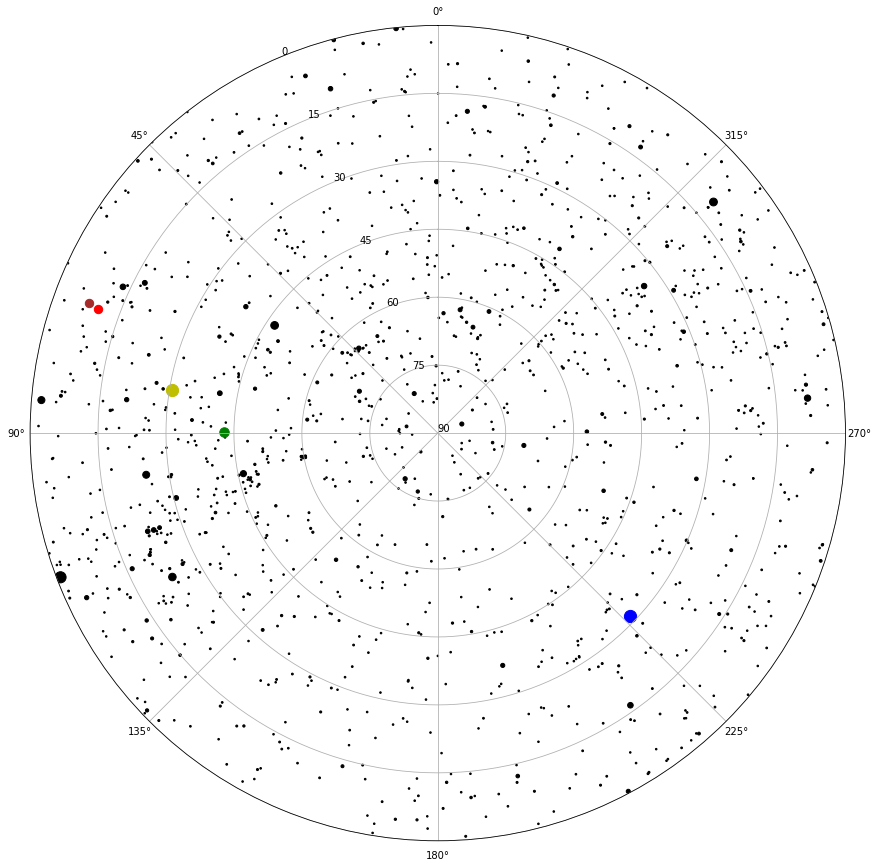

In [17]:
chart.display()